# Step 3: Apply neural networks

In [1]:
from config import models_isot_path
from helpers.metrics_plot import classification_summary

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, LSTM, Bidirectional
import pandas as pd
import joblib


## GRU

In [2]:
news = pd.read_csv("data/isot_news.csv")

max_words = 20000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(news['text'])

sequences = tokenizer.texts_to_sequences(news['text'])
X = pad_sequences(sequences, maxlen=max_len)

y = news['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
joblib.dump(tokenizer, f'{models_isot_path}/tokenizer_isot.joblib')


['models/isot/tokenizer_isot.joblib']

In [4]:
gru = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    GRU(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gru.summary()


/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
gru.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = gru.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")


Epoch 1/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 47s 106ms/step - accuracy: 0.9061 - loss: 0.2550 - val_accuracy: 0.9760 - val_loss: 0.0781
Epoch 2/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 44s 101ms/step - accuracy: 0.9742 - loss: 0.0700 - val_accuracy: 0.9796 - val_loss: 0.0633
Epoch 3/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 44s 100ms/step - accuracy: 0.9968 - loss: 0.0119 - val_accuracy: 0.9841 - val_loss: 0.0542
Epoch 4/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.9983 - loss: 0.0068 - val_accuracy: 0.9806 - val_loss: 0.0765
Epoch 5/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 46s 105ms/step - accuracy: 0.9909 - loss: 0.0249 - val_accuracy: 0.9751 - val_loss: 0.0992
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9819 - loss: 0.0665
Test Accuracy: 0.97980


242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.98702   0.96761   0.97722      3458
           1    0.97415   0.98968   0.98186      4265

    accuracy                        0.97980      7723
   macro avg    0.98059   0.97865   0.97954      7723
weighted avg    0.97991   0.97980   0.97978      7723



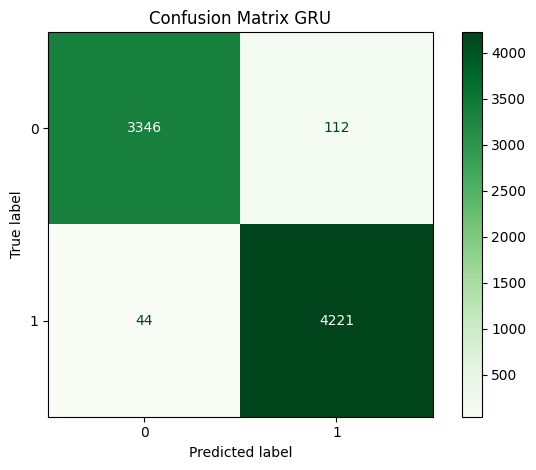

In [6]:
y_pred_probs = gru.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

classification_summary(y_test, y_pred, title="Confusion Matrix GRU", cmap="Greens")


In [7]:
gru.save(f"{models_isot_path}/gru.h5")


## LSTM

In [8]:
lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])


/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")


Epoch 1/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 53s 119ms/step - accuracy: 0.9217 - loss: 0.2158 - val_accuracy: 0.9628 - val_loss: 0.1081
Epoch 2/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 55s 125ms/step - accuracy: 0.9899 - loss: 0.0352 - val_accuracy: 0.9822 - val_loss: 0.0568
Epoch 3/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 57s 131ms/step - accuracy: 0.9949 - loss: 0.0158 - val_accuracy: 0.9832 - val_loss: 0.0593
Epoch 4/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 61s 141ms/step - accuracy: 0.9983 - loss: 0.0075 - val_accuracy: 0.9650 - val_loss: 0.1411
Epoch 5/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 57s 130ms/step - accuracy: 0.9972 - loss: 0.0120 - val_accuracy: 0.9812 - val_loss: 0.0709
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9859 - loss: 0.0523
Test Accuracy: 0.98692


242/242 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.99382   0.97687   0.98527      3458
           1    0.98150   0.99508   0.98824      4265

    accuracy                        0.98692      7723
   macro avg    0.98766   0.98597   0.98676      7723
weighted avg    0.98702   0.98692   0.98691      7723



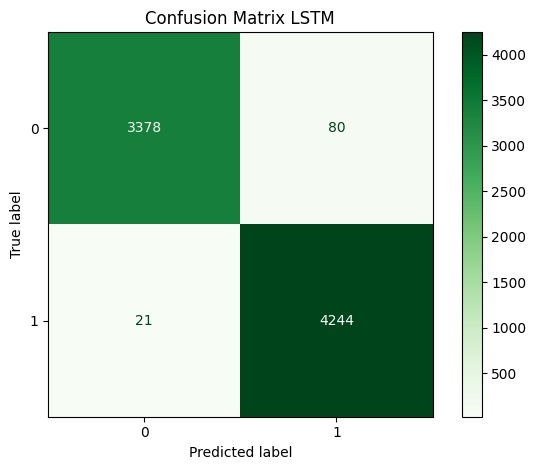

In [11]:
y_pred_probs = lstm.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

classification_summary(y_test, y_pred, title="Confusion Matrix LSTM", cmap="Greens")


In [12]:
lstm.save(f"{models_isot_path}/lstm.h5")


## Bi-LSTM

In [13]:
bi_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(1, activation='sigmoid')
])


/Users/katerynamelnykova/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
bi_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bi_lstm.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
bi_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

loss, accuracy = bi_lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.5f}")


Epoch 1/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 108s 247ms/step - accuracy: 0.9146 - loss: 0.2343 - val_accuracy: 0.9777 - val_loss: 0.0680
Epoch 2/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 113s 259ms/step - accuracy: 0.9856 - loss: 0.0364 - val_accuracy: 0.9858 - val_loss: 0.0466
Epoch 3/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 112s 258ms/step - accuracy: 0.9966 - loss: 0.0114 - val_accuracy: 0.9819 - val_loss: 0.0479
Epoch 4/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 111s 255ms/step - accuracy: 0.9939 - loss: 0.0207 - val_accuracy: 0.9751 - val_loss: 0.1157
Epoch 5/5
435/435 ━━━━━━━━━━━━━━━━━━━━ 117s 269ms/step - accuracy: 0.9947 - loss: 0.0163 - val_accuracy: 0.9738 - val_loss: 0.0767
242/242 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.9804 - loss: 0.0614
Test Accuracy: 0.98058


242/242 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
Classification Report:
              precision    recall  f1-score   support

           0    0.96962   0.98757   0.97851      3458
           1    0.98976   0.97491   0.98228      4265

    accuracy                        0.98058      7723
   macro avg    0.97969   0.98124   0.98040      7723
weighted avg    0.98074   0.98058   0.98059      7723



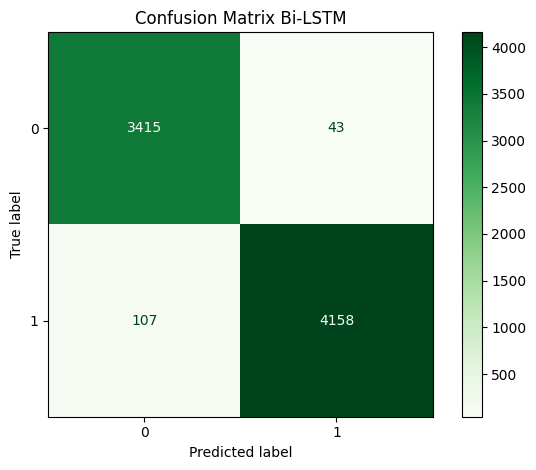

In [16]:
y_pred_probs = bi_lstm.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

classification_summary(y_test, y_pred, title="Confusion Matrix Bi-LSTM", cmap="Greens")


In [17]:
bi_lstm.save(f"{models_isot_path}/bi_lstm.h5")
